# Online credit card Fraud Detection

## Questions & Answers


---



### Question: Why Colab?

> #### Answer: Even with 48GB of DDR4 RAM, I was receiving memory errors with this dataset, therefore I am opting to Google for an answer to my computing problems. Thank you!!!




---

### Question: Why not just use chunksize?
> #### Answer: My preference is to not, for this particular project there are over 200 files that would need to be created, and while this is an easy task for python to overcome, using Colab is simply cleaner.


---


### Question: Why not just use a database?
> #### Answer: My preference is to not, at this time.

## Method of Operation


*   Google Colab




## Data Source

Kaggle dataset: https://www.kaggle.com/c/ieee-fraud-detection/data

## Import the dependancies

In [100]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns

from os import chdir
from google.colab import drive
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

test_identity.csv     train_identity.csv
test_transaction.csv  train_transaction.csv


## Change to the data directory for this project

In [0]:
drive.mount('/content/drive')
chdir('/drive/My Drive/Kaggle/FraudDetection/ieee')
!ls

## Load the data

In [0]:
train_id =  pd.read_csv('train_identity.csv', low_memory=False)
train_trans =  pd.read_csv('train_transaction.csv', low_memory=False)

test_id = pd.read_csv('test_identity.csv', low_memory=False)
test_trans = pd.read_csv('test_transaction.csv', low_memory=False)

In [0]:
print('train identity count',len(train_id))
print('train transaction count',len(train_trans))
print('test identity count', len(test_id))
print('test transaction count',len(test_trans))


In [0]:
print(train_trans.head())

In [0]:
print(train_id.head())

In [0]:
print(train_trans.isnull().sum())

There are too many null in the df. Keeping the first 10 features only.

In [0]:
train_trans_new=train_trans.iloc[:,0:10]

In [0]:
print(train_trans_new.head())

In [0]:
print(train_id.isnull().sum())

Keeping first 2 features from the ID file.

In [0]:
train_id_new=train_id[['TransactionID','id_01']]

In [0]:
print(train_id_new.head())

Now we can join the 2 train datasets

In [0]:
train = pd.merge(train_trans_new,train_id_new,on='TransactionID')

In [0]:
print(train.shape)
print(train.head())

Visualize the data- Scatter plot

In [0]:
frauds = train.loc[train['isFraud'] == 1]
legitimate = train.loc[train['isFraud'] == 0]

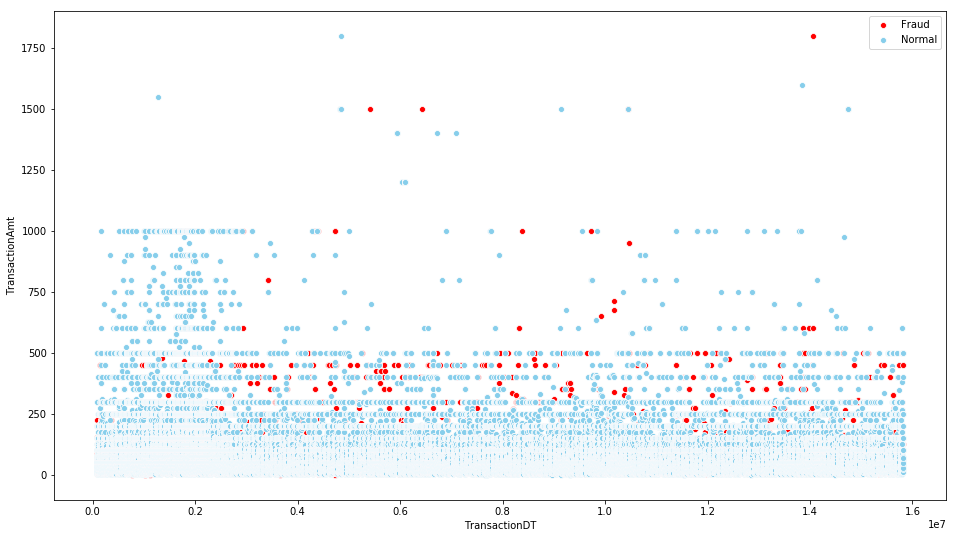

In [119]:
plt.figure(figsize=(16,9))
ax = sns.scatterplot(x=frauds['TransactionDT'],y=frauds['TransactionAmt'],color='red',label='Fraud')
sns.scatterplot(x=legitimate['TransactionDT'],y=legitimate['TransactionAmt'],color='skyblue',label='Normal',ax=ax)


Visualize the data- bar chart
Relationship between frauds and credit card provider

In [0]:
bar_chart= train[["TransactionAmt","card4"]]
bar_chart.groupby("card4").sum().sort_values("TransactionAmt").plot(kind="barh")

In [0]:
bar_chart_frauds= frauds[["TransactionAmt","card4"]]
bar_chart_frauds.groupby("card4").sum().sort_values("TransactionAmt").plot(kind="barh")

In [0]:
bar_chart_non_frauds= non_frauds[["TransactionAmt","card4"]]
bar_chart_non_frauds.groupby("card4").sum().sort_values("TransactionAmt").plot(kind="barh")

In [0]:
print(train.head())

'ProductCD' and 'card4' columns are categorical. We will create dummy variables for cateogorical features using Pandas get_dummies.

In [0]:
ProductCD_dummy = pd.get_dummies(train['ProductCD'],prefix='ProductCD')
card4_dummy = pd.get_dummies(train['card4'],prefix='card4')

Dropping the first variable in each features to prevent perfect multi-collinearity

In [0]:
print(ProductCD_dummy.head())
print(card4_dummy.head())

Dropping the first variable in each features to prevent perfect multi-collinearity ('ProductCD_C', 'card4_american express')

In [0]:
ProductCD_dummy = ProductCD_dummy.drop('ProductCD_C',axis=1)
card4_dummy = card4_dummy.drop('card4_american express',axis=1)

Drop 'ProductCD' and 'card4' replace features with the dummies above

In [0]:
train=train.drop(['ProductCD','card4'],axis=1)

Join new create features to train data frame

In [0]:
train=train.join(ProductCD_dummy)
train=train.join(card4_dummy)

Remove the column 'TransactionID' as this is outside our scope and unrelevant data

In [0]:
train=train.drop('TransactionID',axis=1)

Remove NANies

In [0]:
train_new = train.dropna()

In [0]:
print(train_new.head())

Create x-train and y_train

In [0]:
x= train_new.drop('isFraud',axis=1)
y= train_new['isFraud']

Prep train/test dataset

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Sklearn Logistic regression

In [0]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(x_train,y_train)

The most important part

In [0]:
score = 'Score',logistic.score(x_test,y_test) * 100
print("An accuracy of: " + str(round(score[1], 2)) + "%")